This script tests add_noise.ipynb

It runs some examples to make sure that the script is working correctly.

In [1]:
import numpy as np
import eagle_constants_and_units as c
import cosmo_utils as csu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid
from astropy import constants as const
from astropy import units as u

import get_halpha_SB

%matplotlib inline

%run 'load_data.ipynb'
%run 'add_noise.ipynb'

### Make mock data set

To demonstrate the dependence of the different noise sources on time, I need a mock data set that I will add noise to.
How about not even using the EAGLE data at first, instead just using a circle of ones on a background of zeros (to make everything very clear!).

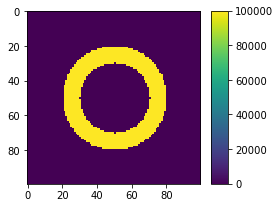

In [2]:
size = 100
pretenddata = np.zeros((size,size))
for j in np.arange(size)-size/2:
    for i in np.arange(size)-size/2:
        if np.sqrt(j**2 + i**2) < 30. and np.sqrt(j**2 + i**2) > 20. :  
            pretenddata[j+size/2,i+size/2] = 100000.
    
def plotdata(pretenddata,ax=None,bounds=None):
    oneplot=False
    if ax is None:
        fig = plt.figure(figsize=(6, 3.2))
        ax = fig.add_subplot(111)
        oneplot=True
        ax.set_title('Pretend Data')
    if bounds is None:
        img = ax.imshow(pretenddata)
    else:
        img = ax.imshow(pretenddata,vmin=bounds[0],vmax=bounds[1])
    #plt.imshow(pretenddata)
    ax.set_aspect('equal')
    div = axgrid.make_axes_locatable(ax)
    cax = div.append_axes("right",size="10%",pad=0.15)
    #cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
    #cax.get_xaxis().set_visible(False)
    #cax.get_yaxis().set_visible(False)
    #cax.patch.set_alpha(0)
    #cax.set_frame_on(False)
    #if fixscale:
    cbar = plt.colorbar(img,cax=cax,orientation='vertical')#,boundaries=np.linspace(0,90000))
    cbar.ax.tick_params()
    if oneplot:
        plt.show()

fig, (ax1) = plt.subplots(1, 1, figsize=(4, 4))
plotdata(pretenddata,ax=ax1)
plt.tight_layout()

This will be a handy plotting function for looking at the R and B_sky values.

In [3]:
def plthist(ax,B_sky,R,title='',label1='',label2='',ylim=[0,8500],xlim=[-1500,2000]):
    ax.hist(np.ravel(B_sky),edgecolor='black', alpha = 0.5,label=label1)
    ax.hist(np.ravel(R),edgecolor='black', alpha = 0.5, label=label2)
    ax.text(0.6,0.7,r'$\sigma$_sb = %.1f'%(np.std(B_sky)),transform=ax.transAxes)
    ax.text(0.6,0.6,r'$\sigma$_r = %.1f'%(np.std(R)),transform=ax.transAxes)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.set_title(title)

## Start adding noise to the mock data

### Example 1: No binning (resolution = 2.8), one exposure (expnum = 1), different exposure times

The next step is to start adding noise i.e. integrate for a small amount of time.

The add_noise function takes a couple inputs along with the data:
1. resolution
2. exposure time
3. readout noise value (optional)
4. toggle to use CMOS detectors (optional)

Let's not use the CMOS detectors, and let's use the default read out noise for now.

Let's just say we are not binning at first, so the resolution is the same as the detector (2.8").

And finally, let's use various exposure times, starting with one minute (60 seconds) and going upwards by orders of magnitude from there.  Also added the 2000s exposure to compare with the read out noise, since that is when sky background noise catches up to readout noise (see plots below to illustrate this).

Let's just say there will be one exposure (expnum = 1), used to calculate the read out noise.  If we leave that empty, the addnoise function will assume hour long exposures.

In [109]:
%run 'add_noise.ipynb'
machine='coho'
data = pretenddata; resolution = 2.8; exptime = 60.
noiseadded_signal1,B_sky_array1,R_array1 = addnoise(data,resolution,log=False,exptime=exptime, expnum=1, debugging=True)

data = pretenddata; resolution = 2.8; exptime = 600.
noiseadded_signal2,B_sky_array2,R_array2 = addnoise(data,resolution,log=False,exptime=exptime, expnum=1, debugging=True)

data = pretenddata; resolution = 2.8; exptime = 2000.
noiseadded_signal22,B_sky_array22,R_array22 = addnoise(data,resolution,log=False,exptime=exptime, expnum=1, debugging=True)

data = pretenddata; resolution = 2.8; exptime = 6000.
noiseadded_signal3,B_sky_array3,R_array3 = addnoise(data,resolution,log=False,exptime=exptime, expnum=1, debugging=True)

******* Adding noise to the input data to simulate a mock observation by the 48.0 lens Dragonfly Telescope *******
DEBUGGING: the binpix_size (resolution) is 2.8
DEBUGGING: the pixel size (inherent) is 2.8
VERBOSE: Using old cameras... (QE = 0.48, R = 10.)
DEBUGGING: R is : 10.0
DEBUGGING: the number of pixels per bin is 1.0
DEBUGGING: the total object signal [electrons] detected ranges from: 0.0 to 3.47759968285
The width of the filter that the data was taken with is 3.0 nm. 
DEBUGGING: Sky background in filter width of 3.0 nm is calculated already: 1.473626.
Adding sky background noise and shot noise...
DEBUGGING: the background in the bandwidth is: 1.473626 photon/s/arcsec^2/m^2
DEBUGGING: the background signal, B_sky, is: 3.6338474778 electron/s/pixel
DEBUGGING: the mean total background signal, B_sky_total [electrons], is: 218.030848668
DEBUGGING: the total background noisy signal [electrons] ranges from: -56.2945754014 to 53.2772569747
Adding read out noise to the signal...
DEBUG

Let's try plotting the R and B_sky arrays to see what the distribution of noise is.

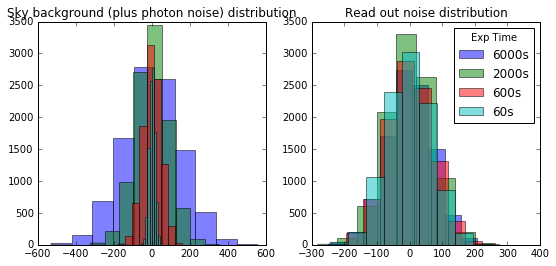

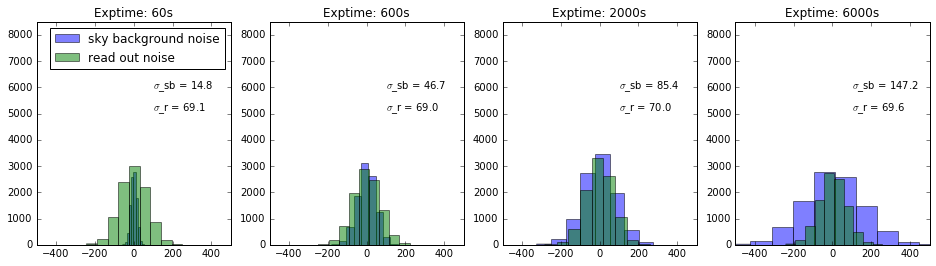

In [112]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.set_title('Sky background (plus photon noise) distribution')
for data in [B_sky_array3,B_sky_array22,B_sky_array2,B_sky_array1]:
    ax1.hist(np.ravel(data),edgecolor='black', alpha = 0.5)

#fig = plt.figure(figsize=(6, 3.2))
#ax = fig.add_subplot(111)
ax2.set_title('Read out noise distribution')
for data,label in zip([R_array3,R_array22,R_array2,R_array1],\
                      ['6000s','2000s','600s','60s']):
    ax2.hist(np.ravel(data),edgecolor='black', alpha = 0.5,label=label)
ax2.legend(title='Exp Time')
    
fig2, (ax3, ax4,ax44,ax5) = plt.subplots(1, 4, figsize=(16, 4))
plthist(ax3,B_sky_array1,R_array1,title='Exptime: 60s',\
        label1='sky background noise',label2='read out noise',xlim=[-500,500])
ax3.legend()
plthist(ax4,B_sky_array2,R_array2,title='Exptime: 600s',xlim=[-500,500])
plthist(ax44,B_sky_array22,R_array22,title='Exptime: 2000s',xlim=[-500,500])
plthist(ax5,B_sky_array3,R_array3,title='Exptime: 6000s',xlim=[-500,500])

plt.show()

From the plots above, one can see that the readout noise dominates until exposure time of ~30 minutes, when the sky background has grown to a similar level.  From that time onwards, the sky background continues growing.

Let's plot the noise added data to see what it looks like.

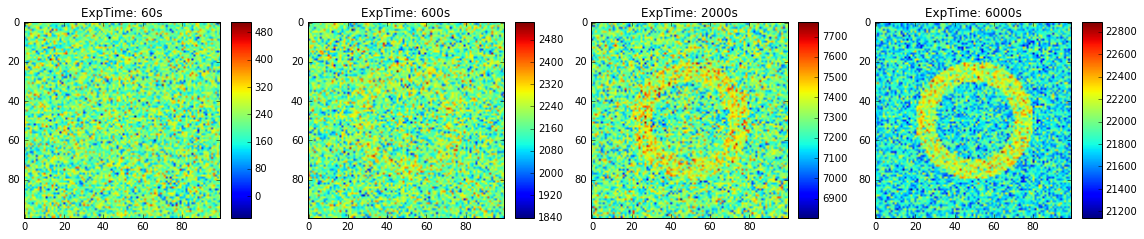

In [113]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))
plotdata(noiseadded_signal1,ax=ax1)
ax1.set_title('ExpTime: 60s')
plotdata(noiseadded_signal2,ax=ax2)
ax2.set_title('ExpTime: 600s')
plotdata(noiseadded_signal22,ax=ax3)
ax3.set_title('ExpTime: 2000s')
plotdata(noiseadded_signal3,ax=ax4)
ax4.set_title('ExpTime: 6000s')
plt.tight_layout()

### Example 2:  No binning (resolution = 2.8), comparing results between old R and R = 0.001

******* Adding noise to the input data to simulate a mock observation by the 48.0 lens Dragonfly Telescope *******
VERBOSE: Using old cameras... (QE = 0.48, R = 10.)
The width of the filter that the data was taken with is 3.0 nm. 
Adding sky background noise and shot noise...
Adding read out noise to the signal...
Adding dark current to the signal...
******* Finished. *******

******* Adding noise to the input data to simulate a mock observation by the 48.0 lens Dragonfly Telescope *******
VERBOSE: Using old cameras... (QE = 0.48, R = 10.)
The width of the filter that the data was taken with is 3.0 nm. 
Adding sky background noise and shot noise...
Adding read out noise to the signal...
Adding dark current to the signal...
******* Finished. *******

******* Adding noise to the input data to simulate a mock observation by the 48.0 lens Dragonfly Telescope *******
VERBOSE: Using old cameras... (QE = 0.48, R = 10.)
The width of the filter that the data was taken with is 3.0 nm. 
Adding sk

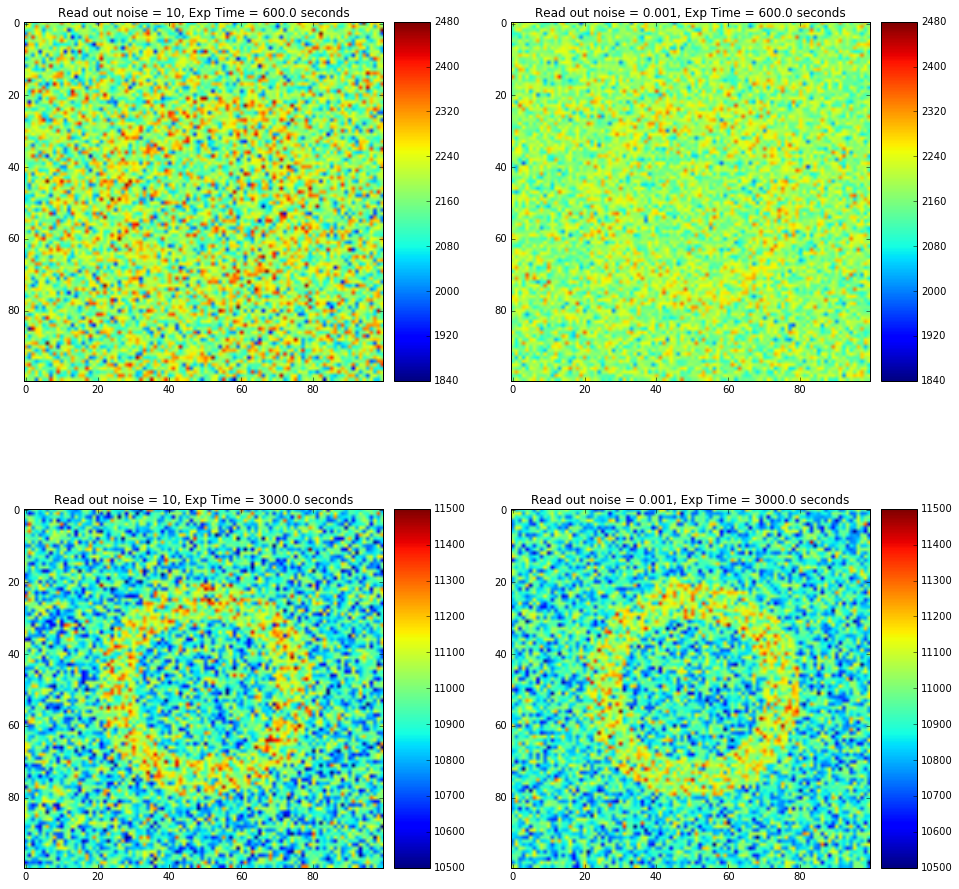

In [117]:
data = pretenddata; resolution = 2.8; exptime1 = 600.;
noiseadded_signal1,B_sky_array1,R_array1 = addnoise(data,resolution,log=False,\
                                                    exptime=exptime1, expnum=1, debugging=False)

noiseadded_signal2,B_sky_array2,R_array2 = addnoise(data,resolution,log=False,R=0.001,\
                                                    exptime=exptime1, expnum=1, debugging=False)

exptime2 = 3000.

noiseadded_signal3,B_sky_array3,R_array3 = addnoise(data,resolution,log=False,\
                                                    exptime=exptime2, expnum=1, debugging=False)

noiseadded_signal4,B_sky_array4,R_array4 = addnoise(data,resolution,log=False,R=0.001,\
                                                    exptime=exptime2, expnum=1, debugging=False)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 16))
plotdata(noiseadded_signal1,ax=ax1,bounds=[1840,2480])#,bounds=[700,1000])
plotdata(noiseadded_signal2,ax=ax2,bounds=[1840,2480])#,bounds=[700,1000])
plotdata(noiseadded_signal3,ax=ax3,bounds=[10500,11500])
plotdata(noiseadded_signal4,ax=ax4,bounds=[10500,11500])
ax1.set_title('Read out noise = 10'+', Exp Time = %s seconds'%exptime1)
ax2.set_title('Read out noise = 0.001'', Exp Time = %s seconds'%exptime1)
ax3.set_title('Read out noise = 10'', Exp Time = %s seconds'%exptime2)
ax4.set_title('Read out noise = 0.001'', Exp Time = %s seconds'%exptime2)

### Example 3: Binning (resolution = 100 arcsec)

In [119]:
data = pretenddata; exptime = 1.;

resolution_nobin = 2.8;
noiseadded_signal_nobin,B_sky_array_nobin,R_array_nobin = addnoise(data,resolution_nobin,log=False,\
                                                                    exptime=exptime, expnum=1, debugging=True)

resolution_bin = 100.;
noiseadded_signal_bin,B_sky_array_bin,R_array_bin = addnoise(data,resolution_bin,log=False,\
                                                            exptime=exptime, expnum=1, debugging=True)


******* Adding noise to the input data to simulate a mock observation by the 48.0 lens Dragonfly Telescope *******
DEBUGGING: the binpix_size (resolution) is 2.8
DEBUGGING: the pixel size (inherent) is 2.8
VERBOSE: Using old cameras... (QE = 0.48, R = 10.)
DEBUGGING: R is : 10.0
DEBUGGING: the number of pixels per bin is 1.0
DEBUGGING: the total object signal [electrons] detected ranges from: 0.0 to 0.0579599947142
The width of the filter that the data was taken with is 3.0 nm. 
DEBUGGING: Sky background in filter width of 3.0 nm is calculated already: 1.473626.
Adding sky background noise and shot noise...
DEBUGGING: the background in the bandwidth is: 1.473626 photon/s/arcsec^2/m^2
DEBUGGING: the background signal, B_sky, is: 3.6338474778 electron/s/pixel
DEBUGGING: the mean total background signal, B_sky_total [electrons], is: 3.6338474778
DEBUGGING: the total background noisy signal [electrons] ranges from: -7.25868432454 to 7.54956352092
Adding read out noise to the signal...
DEBU

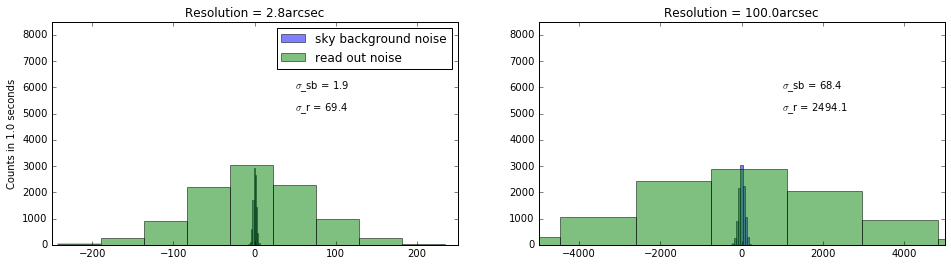

In [121]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
plthist(ax1,B_sky_array_nobin,R_array_nobin,title='Resolution = %sarcsec'%resolution_nobin,\
        label1='sky background noise',label2='read out noise',xlim=[-250, 250])
ax1.legend()
plthist(ax2,B_sky_array_bin,R_array_bin,title='Resolution = %sarcsec'%resolution_bin,\
        xlim=[-5000, 5000])
ax1.set_ylabel('Counts in %s seconds'%exptime)
plt.show()

The number of pixels that are binned over is 1276.  We can check that the standard deviations are increasing correctly:

$\sigma_{bin}$ = $\sqrt(numpix) \times \sigma$<br>

In [122]:
numpix = 1276
print "Binned over %s pixels, the new stddev of readout noise should be about %s" % (numpix,(np.sqrt(numpix)*69.1))
print "Binned over %s pixels, the new stddev of sky background noise should be about %s" % (numpix,(np.sqrt(numpix)*1.9))

Binned over 1276 pixels, the new stddev of readout noise should be about 2468.33092595
Binned over 1276 pixels, the new stddev of sky background noise should be about 67.8701701781


### Example 4: Binning the data before and after adding the noise


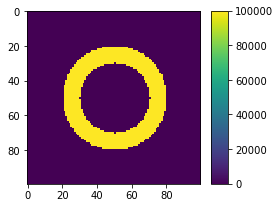

In [4]:
fig, (ax1) = plt.subplots(1, 1, figsize=(4, 4))
plotdata(pretenddata,ax=ax1)
plt.tight_layout()

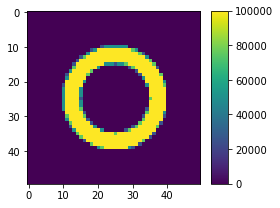

In [5]:
import get_halpha_SB
pretenddata_binned = get_halpha_SB.imreduce(pretenddata, 2, log=False, method = 'average')
fig, (ax1) = plt.subplots(1, 1, figsize=(4, 4))
plotdata(pretenddata_binned,ax=ax1)
plt.tight_layout()

In [6]:
exptime = 600.;

resolution_nobin = 2.8;
noiseadded_signal_nobin,B_sky_array_nobin,R_array_nobin = addnoise(pretenddata,resolution_nobin,log=False,\
                                                                    exptime=exptime, expnum=1, debugging=True)

resolution_bin = 2*resolution_nobin;
noiseadded_signal_bin,B_sky_array_bin,R_array_bin = addnoise(pretenddata_binned,resolution_bin,log=False,\
                                                                    exptime=exptime, expnum=1, debugging=True)



******* Adding noise to the input data to simulate a mock observation by the 48.0 lens Dragonfly Telescope *******
DEBUGGING: the binpix_size (resolution) is 2.8
DEBUGGING: the pixel size (inherent) is 2.8
VERBOSE: Using old cameras... (QE = 0.48, R = 10.)
DEBUGGING: R is : 10.0
DEBUGGING: the number of pixels per bin is 1.0
DEBUGGING: the total object signal [electrons] detected ranges from: 0.0 to 34.7759968285
The width of the filter that the data was taken with is 3.0 nm. 
DEBUGGING: Sky background in filter width of 3.0 nm is calculated already: 1.473626.
Adding sky background noise and shot noise...
DEBUGGING: the background in the bandwidth is: 1.473626 photon/s/arcsec^2/m^2
DEBUGGING: the background signal, B_sky, is: 3.6338474778 electron/s/pixel
DEBUGGING: the mean total background signal, B_sky_total [electrons], is: 2180.30848668
DEBUGGING: the total background noisy signal [electrons] ranges from: -174.866293844 to 158.928844355
Adding read out noise to the signal...
DEBUG